In [2]:
from enviroments.SliderEnv import SliderEnv
import time
import os
import glob
import numpy as np 

from matplotlib import pyplot as plt

from stable_baselines3 import PPO


In [18]:

trial_name = "model_v15-forward3-5-3-stairs"
model_save_path = "./trained_models/" + trial_name

env = SliderEnv(trial_name)

model =  PPO.load(model_save_path + "/model-49", env=env)

Wrapping the env with a `Monitor` wrapper
Wrapping the env in a DummyVecEnv.


/opt/homebrew/lib/python3.10/site-packages/gym/spaces/box.py:73: UserWarning: WARN: Box bound precision lowered by casting to float32
  logger.warn(


In [19]:
def trial_force(force, render = False):
    # Reset enviroment
    obs = env.reset()

    env.purtrub_max = [0,0,0]
    env.step_time = 1.0
    env.max_ep_time = 100 # seconds

    offset = int(np.random.random() * 100)

    for i in range(300):


        if(i == 20 + offset):
            env.apply_force(force)

        action, _state = model.predict(obs, deterministic=True)

        obs, reward, done, info = env.step(action)

        if render:
            env.render()

        # Fail
        if done:
            return False

    # Sucsess    
    return True

## Single axis force

In [32]:
trials_per = 5
force_values = np.linspace(-200, 200, 40)
sucsess_nums = np.zeros(force_values.shape)

for i in range(force_values.shape[0]):
    force_value = force_values[i]

    sucsess_num_trial = 0
    for num in range(trials_per):
        sucsess = trial_force([force_value, 0, 0], False)

        sucsess_num_trial += int(sucsess)

    sucsess_nums[i] = sucsess_num_trial

    print(force_value)
    print(sucsess_num_trial)

-200.0
0
-189.74358974358975
0
-179.48717948717947
0
-169.23076923076923
0
-158.97435897435898
0
-148.71794871794873
0
-138.46153846153845
0
-128.2051282051282
1
-117.94871794871794
0
-107.69230769230768
1
-97.43589743589743
4
-87.17948717948717
2
-76.9230769230769
5
-66.66666666666666
4
-56.41025641025641
5
-46.15384615384613
5
-35.897435897435884
5
-25.641025641025635
5
-15.384615384615358
5
-5.12820512820511
5
5.128205128205138
5
15.384615384615415
5
25.641025641025664
5
35.89743589743591
5
46.15384615384619
5
56.41025641025641
5
66.66666666666669
5
76.92307692307696
5
87.17948717948718
5
97.43589743589746
4
107.69230769230774
4
117.94871794871796
3
128.20512820512823
1
138.4615384615385
0
148.71794871794873
0
158.974358974359
0
169.23076923076928
0
179.4871794871795
0
189.74358974358978
0
200.0
0


In [30]:
sucsess_numsA = sucsess_nums.copy()

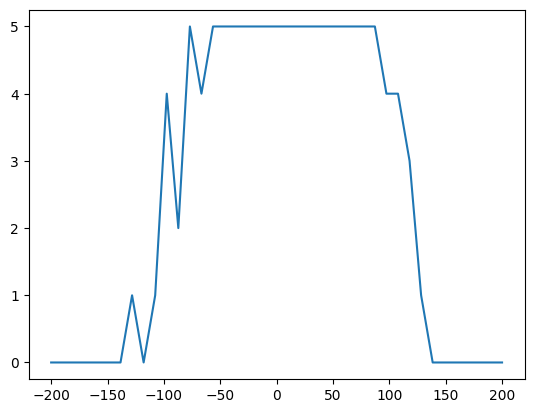

In [33]:

plt.plot(force_values, sucsess_nums)
#plt.plot(force_values, sucsess_numsA)
plt.show()

# Dual axis force

In [51]:
trials_per = 5
force_values_x = np.linspace(-600, 600, 15)
force_values_y = np.linspace(-600, 600, 15)
sucsess_nums = np.zeros((force_values_x.shape[0], force_values_y.shape[0]))

for i in range(force_values_x.shape[0]):
    for j in range(force_values_y.shape[0]):

        force = [force_values_x[i], force_values_y[j], 0]

        sucsess_num_trial = 0
        for num in range(trials_per):
            sucsess = trial_force(force, False)

            sucsess_num_trial += int(sucsess)

        sucsess_nums[i, j] = sucsess_num_trial

        #print(force)
        #print(sucsess_num_trial)

    print(i / 30.0)

0.0
0.03333333333333333
0.06666666666666667
0.1
0.13333333333333333
0.16666666666666666
0.2
0.23333333333333334
0.26666666666666666
0.3
0.3333333333333333
0.36666666666666664
0.4
0.43333333333333335
0.4666666666666667


Text(0.5, 1.0, '0.02s impulse')

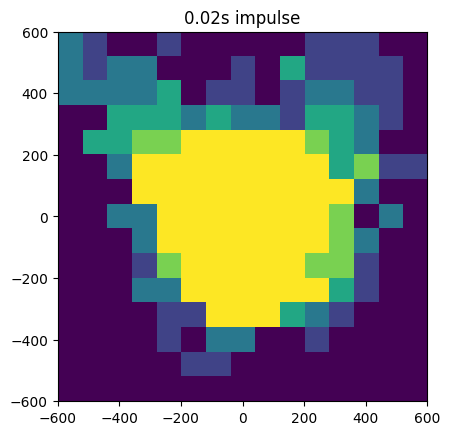

In [52]:
plt.imshow(sucsess_nums, extent=[-600, 600, -600, 600])
plt.title("0.02s impulse")

Text(0.5, 1.0, 'Slope Angle Trials')

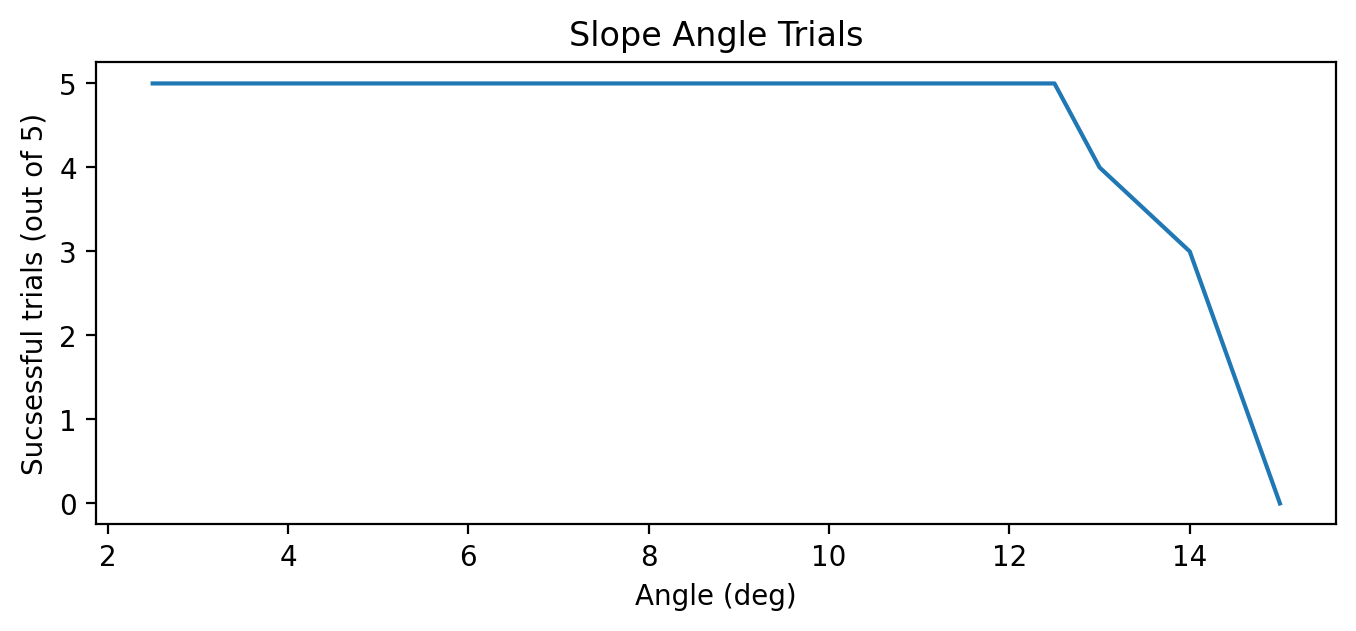

In [13]:
sucsess = [5, 5, 5, 5, 5, 4, 3, 0]
angle =   [2.5, 5, 7.5, 10, 12.5, 13, 14, 15]

plt.figure(dpi = 200, figsize=[8, 3])

plt.plot(angle, sucsess)
plt.xlabel("Angle (deg)")
plt.ylabel("Sucsessful trials (out of 5)")
plt.title("Slope Angle Trials")

Text(0.5, 1.0, 'Stair Climbing Trials')

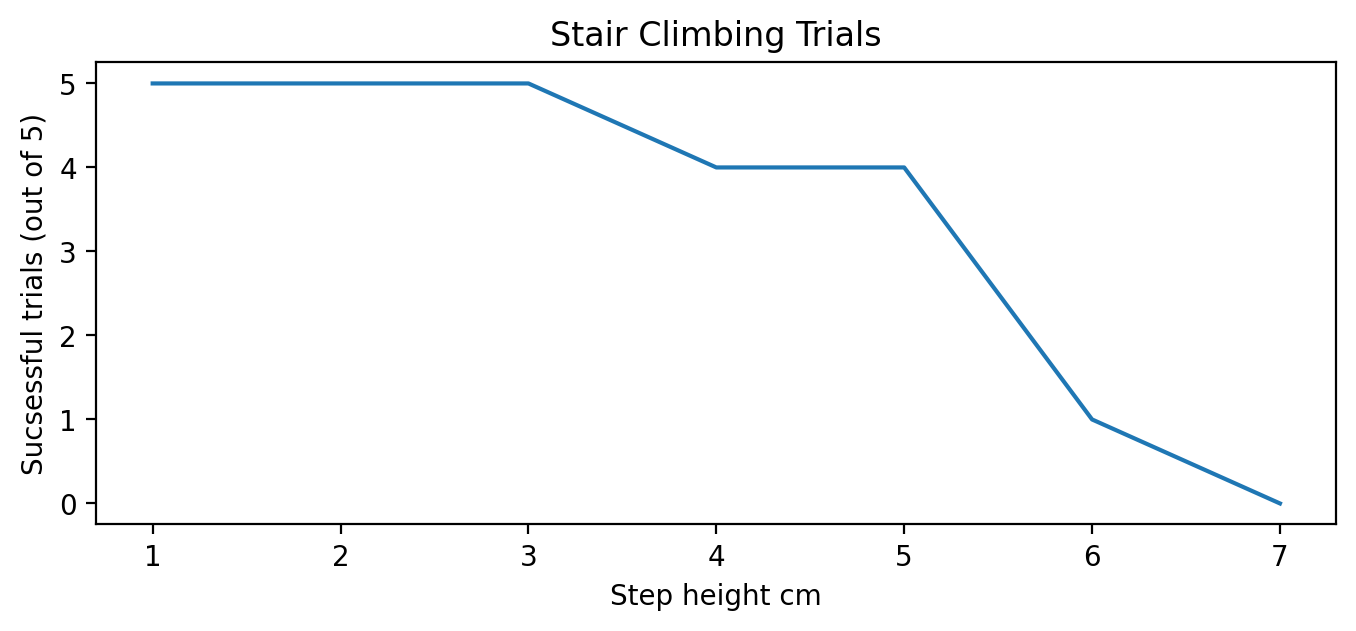

In [3]:
sucsess = [5, 5, 5, 4, 4, 1, 0]
angle =   [1,2,3,4,5,6,7]

plt.figure(dpi = 200, figsize=[8, 3])

plt.plot(angle, sucsess)
plt.xlabel("Step height cm")
plt.ylabel("Sucsessful trials (out of 5)")
plt.title("Stair Climbing Trials")